In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("https://github.com/ParmarthVicky/DataSets/raw/main/Mall_Customers.csv")

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


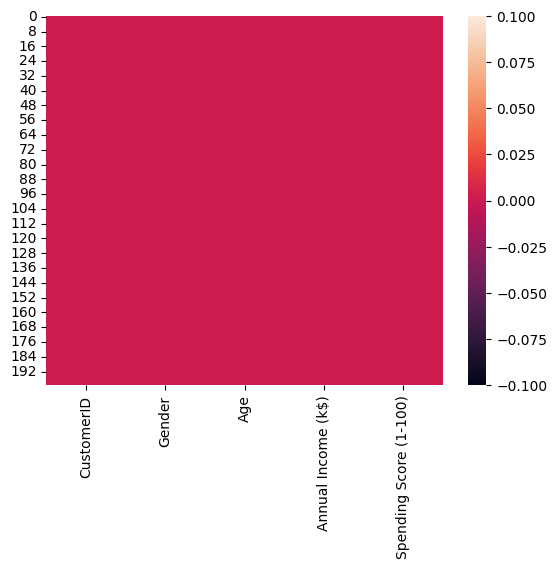

In [34]:
sns.heatmap(df.isnull())
plt.show()

In [35]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [36]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [37]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [38]:
# #data encoding for gender column
# df.replace({"Gender":{"Male":0,"Female":1}}, inplace=True)

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
df=df.rename(columns={"Annual Income (k$)":"Annual Income"})

In [42]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income',
       'Spending Score (1-100)'],
      dtype='object')

In [43]:
df=df.rename(columns={"Spending Score (1-100)":"Spending Score"})

In [44]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
import warnings
warnings.filterwarnings("ignore")

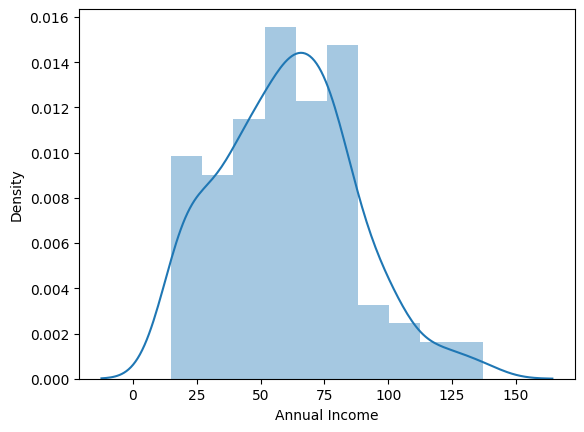

In [48]:
#univariate analysis
#distplot
sns.distplot(df["Annual Income"])
plt.show()

In [49]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

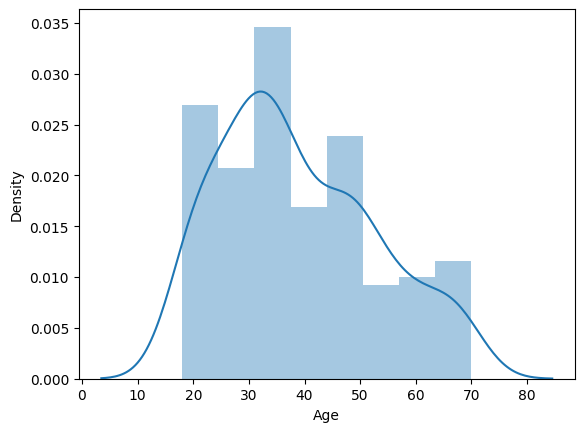

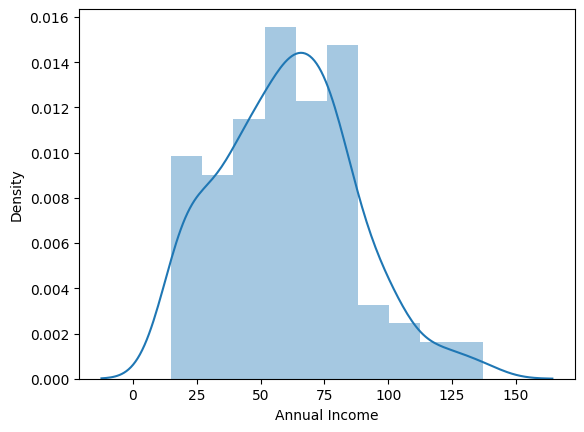

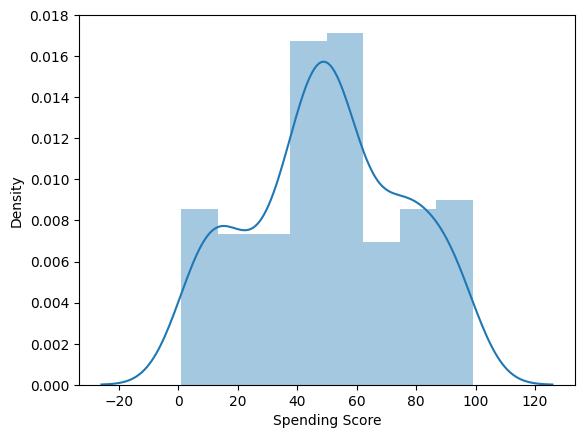

In [50]:
columns=['Age', 'Annual Income', 'Spending Score']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

In [52]:
dff = pd.melt(df, id_vars=['CustomerID', 'Age', 'Annual Income', 'Spending Score'],
              value_vars=['Gender'], var_name='variable', value_name='value')


In [53]:
dff.head()

,CustomerID,Age,Annual Income,Spending Score,variable,value
0,1,19,15,39,Gender,Male
1,2,21,15,81,Gender,Male
2,3,20,16,6,Gender,Female
3,4,23,16,77,Gender,Female
4,5,31,17,40,Gender,Female


In [60]:
dff=dff.rename(columns={"value":"Gender"})

In [61]:
dff.head()

,CustomerID,Age,Annual Income,Spending Score,variable,Gender
0,1,19,15,39,Gender,Male
1,2,21,15,81,Gender,Male
2,3,20,16,6,Gender,Female
3,4,23,16,77,Gender,Female
4,5,31,17,40,Gender,Female


In [63]:
# sns.kdeplot(df["Annual Income"], hue=df["Gender"], shade=True)

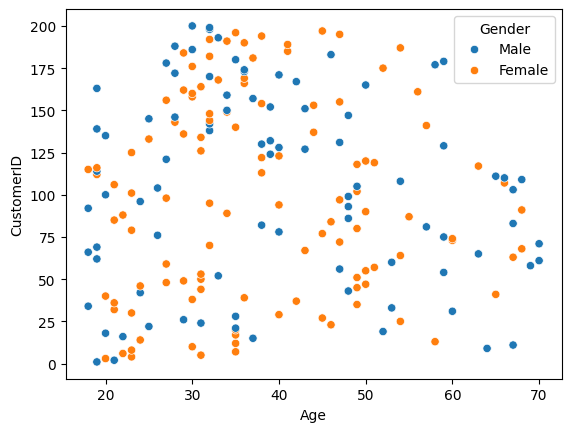

In [65]:


sns.scatterplot(x='Age', y='CustomerID', hue='Gender', data=dff)

# Show the plot
plt.show()


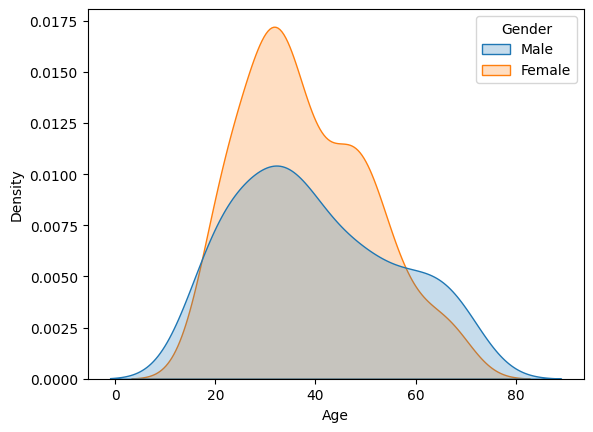

In [67]:

# Plot KDE
sns.kdeplot(data=dff, x='Age', hue='Gender', shade=True)

# Show the plot
plt.show()


In [68]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income', 'Spending Score', 'variable',
       'Gender'],
      dtype='object')

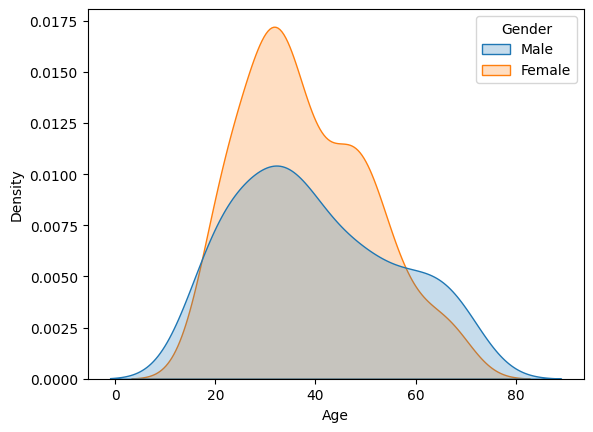

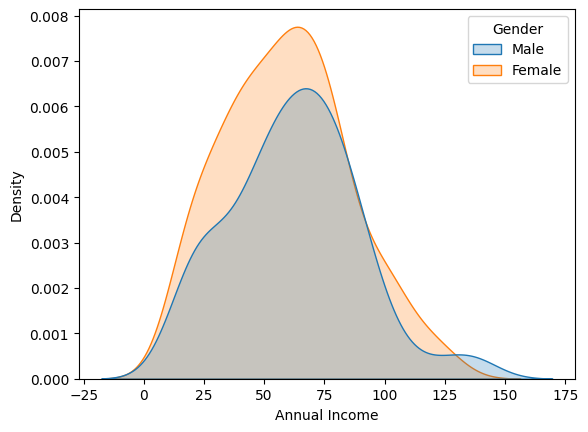

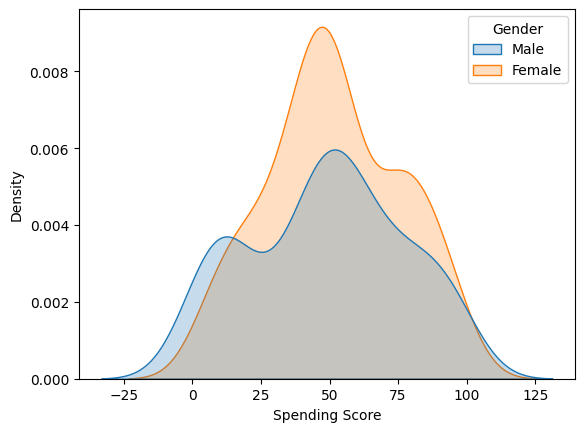

In [70]:
columns=['Age', 'Annual Income', 'Spending Score']
for i in columns:
  plt.figure()
  sns.kdeplot(data=dff,x=dff[i],shade=True, hue="Gender")

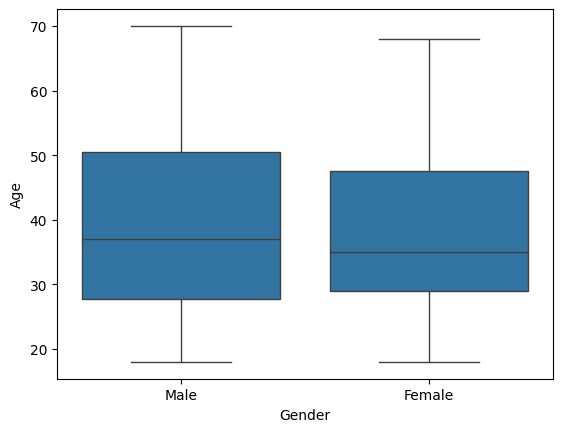

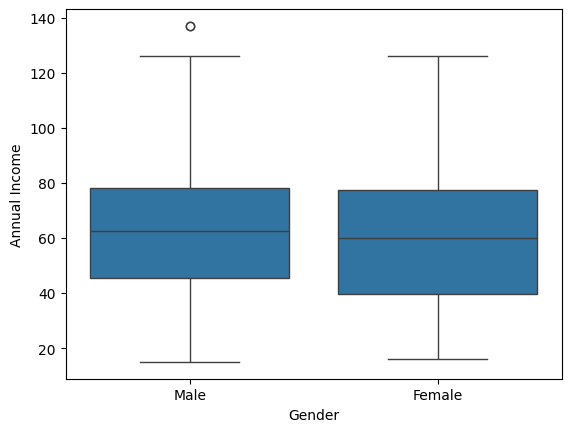

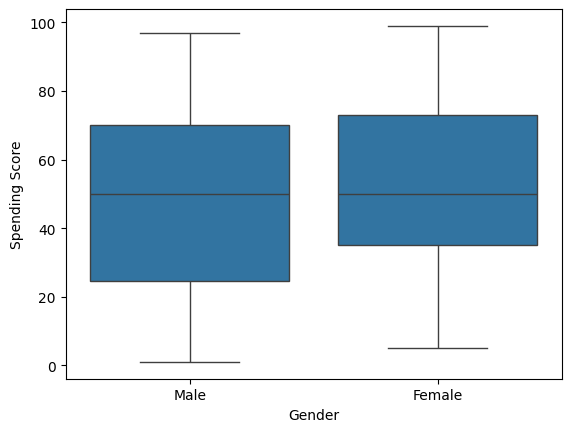

In [71]:
#making boxplot to
column=['Age', 'Annual Income', 'Spending Score']
for i in columns:
  plt.figure()
  sns.boxplot(data=dff, x="Gender", y=dff[i])

In [72]:
dff["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [74]:
#in %
dff["Gender"].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


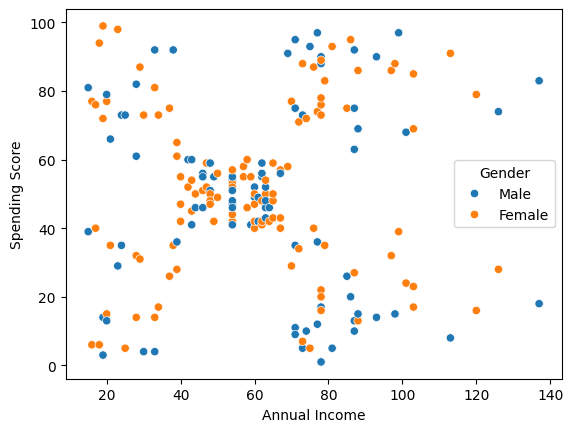

In [78]:
#bivariate analysis
sns.scatterplot(data=dff, x="Annual Income", y="Spending Score", hue="Gender")
plt.show()

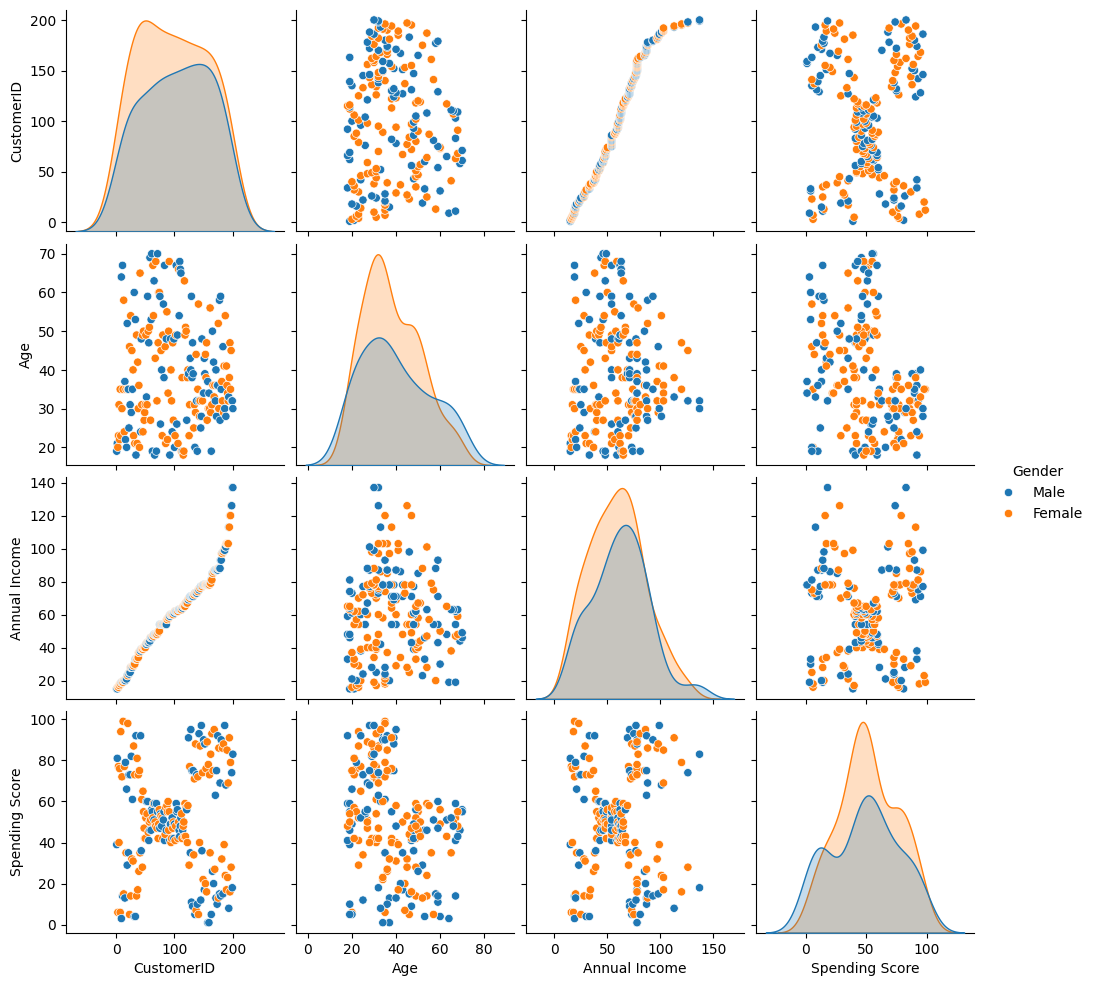

In [79]:
sns.pairplot(dff, hue="Gender")
plt.show()

In [81]:
# df.groupby(["Gender"])["Age","Annual Income","Spendig Score"].mean()
# ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [85]:
# Corrected code to calculate mean values grouped by 'Gender'
dff.groupby('Gender')[['Age', 'Annual Income', 'Spending Score']].mean()


,Age,Annual Income,Spending Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [89]:

grouped_data=dff.groupby('Gender')[['Age', 'Annual Income', 'Spending Score']]


In [90]:
grouped_data.corr()

Age  Annual Income  Spending Score
Gender                                                        
Female Age             1.000000       0.059912       -0.375439
       Annual Income   0.059912       1.000000        0.047542
       Spending Score -0.375439       0.047542        1.000000
Male   Age             1.000000      -0.092978       -0.279628
       Annual Income  -0.092978       1.000000       -0.023684
       Spending Score -0.279628      -0.023684        1.000000

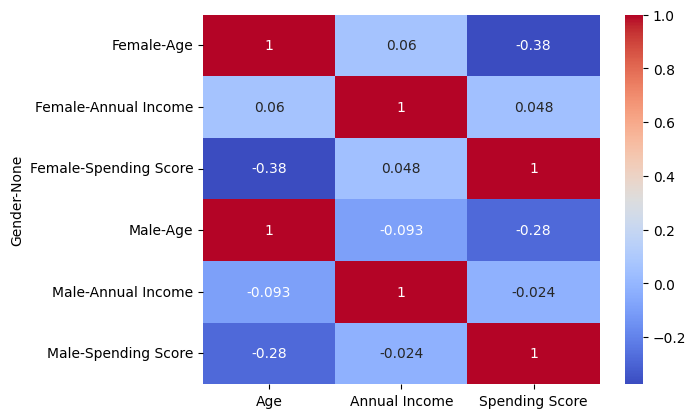

In [93]:
#correlation matrix
sns.heatmap(grouped_data.corr(), annot=True, cmap="coolwarm")
plt.show()

now classification EDA done, now clustering

In [94]:
from sklearn.cluster import KMeans
wcss=[]

In [95]:
dff.head()

,CustomerID,Age,Annual Income,Spending Score,variable,Gender
0,1,19,15,39,Gender,Male
1,2,21,15,81,Gender,Male
2,3,20,16,6,Gender,Female
3,4,23,16,77,Gender,Female
4,5,31,17,40,Gender,Female


In [98]:
X=dff.iloc[:,[2,3]].values

In [101]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

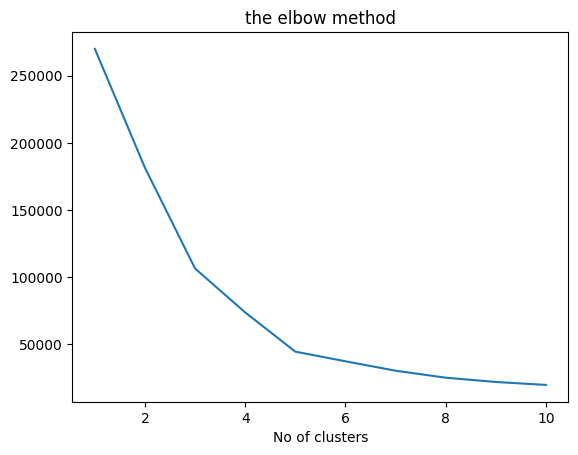

In [102]:
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("No of clusters")
plt.ylable("wcss valueS")
plt.show()

training teh model using unsupervise learning algorithms (K-means)


In [103]:
kmeansmodel=KMeans(n_clusters=5,init="k-means++", random_state=0)

In [104]:
y_kmeans=kmeansmodel.fit_predict(X)

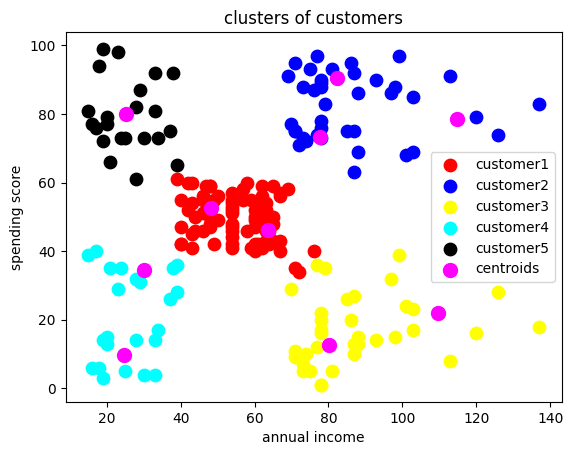

In [111]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c="red",label="customer1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c="blue",label="customer2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c="yellow",label="customer3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c="cyan",label="customer4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c="black",label="customer5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c="magenta",label="centroids")
plt.title("clusters of customers")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()

